In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:
pip install jupyter_dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Input, Output, dcc, html
from jupyter_dash import JupyterDash
from scipy.stats.mstats import trimmed_var
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#from teaching_tools.widgets import ClusterWidget, SCFClusterWidget
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

JupyterDash.infer_jupyter_proxy_config()

In [ ]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    #df.drop(columns=["total_bedrooms", "total_rooms",], inplace=True)

    # Drop NAN rows
    #df.dropna(inplace=True)
    # Imputing with the mode for categorical features
    mode_loc = df["loc"].mode()[0]  # Get the most frequent location
    df["loc"] = df["loc"].fillna(mode_loc)
    mode_title = df["title"].mode()[0]  # Get the most frequent title
    df["title"] = df["title"].fillna(mode_title)
    # Use median for numeric columns
    median_bedroom = df["bedroom"].median()
    df["bedroom"] = df["bedroom"].fillna(median_bedroom)
    median_bathroom = df["bathroom"].median()
    df["bathroom"] = df["bathroom"].fillna(median_bathroom)

    median_parking_space = df["parking_space"].median()
    df["parking_space"] = df["parking_space"].fillna(median_parking_space)



    return df

In [ ]:
Trainp = wrangle(r"/content/Housing_dataset_train.csv")
Testp = wrangle(r"/content/Housing_dataset_test.csv")
print(Trainp.info(),Testp.info(), Trainp.shape, Testp.shape)
Trainp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            14000 non-null  object 
 2   title          14000 non-null  object 
 3   bedroom        14000 non-null  float64
 4   bathroom       14000 non-null  float64
 5   parking_space  14000 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
2,9261,Ekiti,Flat,7.0,5.0,3.0,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898


In [ ]:
Trainp.isnull().sum()

,0
ID,0
loc,0
title,0
bedroom,0
bathroom,0
parking_space,0
price,0


In [ ]:
Testp.isnull().sum()

,0
ID,0
loc,0
title,0
bedroom,0
bathroom,0
parking_space,0


In [ ]:
price_value = Trainp["price"].value_counts()
price_value

,count
price,
1321523.503,8
2717766.381,6
1941667.969,6
1230375.846,6
1359345.269,6
...,...
1376145.296,1
1225606.292,1
2084985.093,1


In [ ]:
import plotly.express as px

fig = px.bar(
    x=price_value.index,  # Price groups
    y=price_value.values, # Frequency (count)
    labels={"x": "Price Group", "y": "Frequency (count)"},
    title="Price Fearful: Price Groups"
)
fig.show()

**Application Layout**

In [ ]:
# Plot histogram of "Price"
fig = px.histogram(Trainp, x="price", title="Price Distribution")
fig.show()

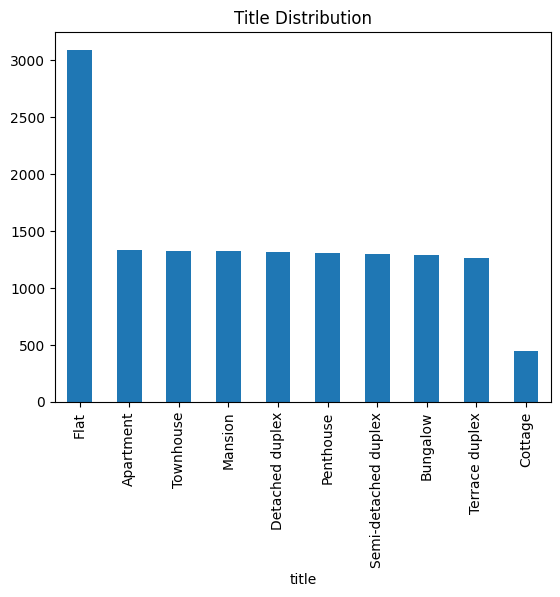

In [ ]:
Title = Trainp["title"].value_counts()
Title.plot(kind="bar", title="Title Distribution");

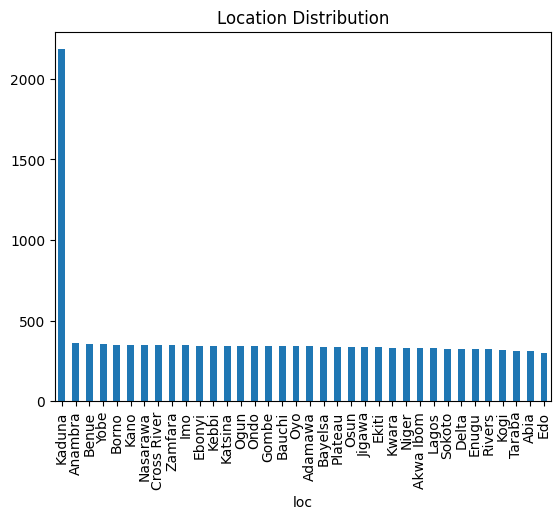

In [ ]:
Loc = Trainp["loc"].value_counts()
Loc.plot(kind="bar", title="Location Distribution");

In [ ]:
import plotly.express as px

fig = px.bar(Trainp, x="loc", y="price", title="Average Price by Location")
fig.update_layout(xaxis_title="Location", yaxis_title="Average Price")
fig.show()

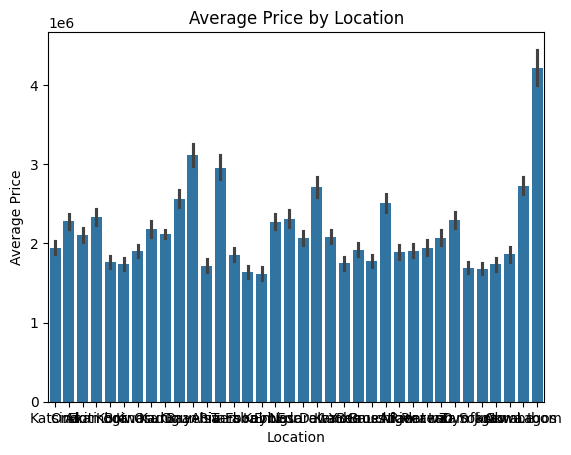

In [ ]:
sns.barplot(x="loc", y="price", data=Trainp
)
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.title("Average Price by Location");

In [ ]:
 #select only numerical columns for correlation calculation:
numerical_cols = Trainp.select_dtypes(include=['number']).columns
Loc_Corr = Trainp[numerical_cols].corr()

Loc_Corr.style.background_gradient(cmap='coolwarm')

,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.216083,0.315599,0.154123,0.167093
bedroom,0.216083,1.000000,0.189322,0.095317,0.496904
bathroom,0.315599,0.189322,1.000000,0.149870,0.200168
parking_space,0.154123,0.095317,0.149870,1.000000,0.101794
price,0.167093,0.496904,0.200168,0.101794,1.000000


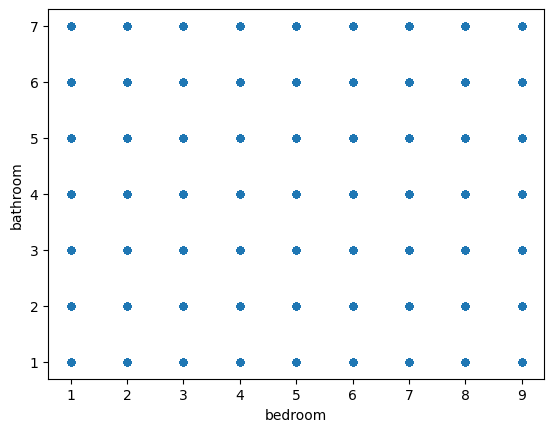

In [ ]:
Trainp.plot.scatter(x="bedroom", y="bathroom", alpha=0.5);

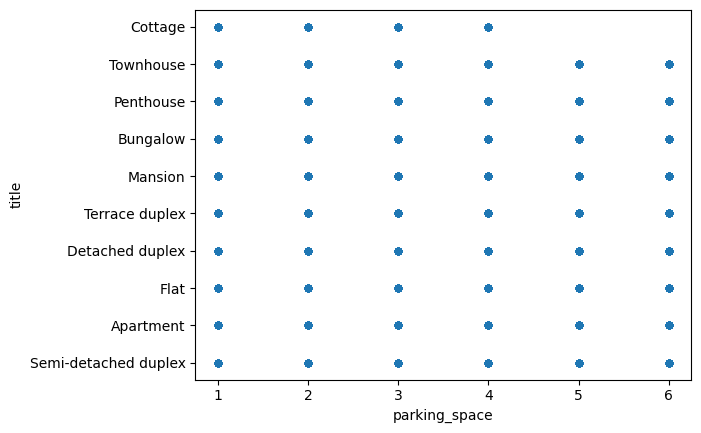

In [ ]:
Trainp.plot.scatter(x="parking_space", y="title", alpha=0.5);

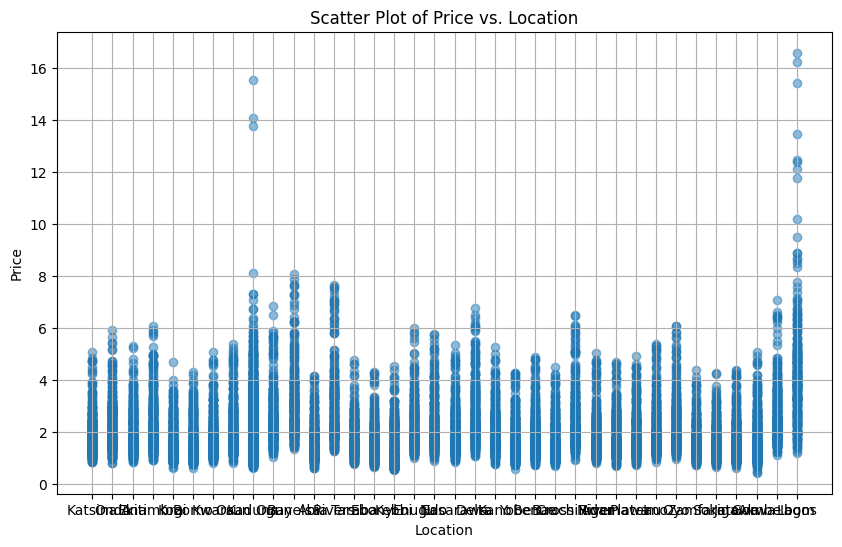

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(Trainp["loc"], Trainp["price"]/1e6, alpha=0.5)
plt.xlabel("Location")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs. Location")
plt.grid(True)  # Add a grid for better readability
plt.show()

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    KMeans(n_clusters=3, random_state=42)
)
model.fit(Trainp)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['loc', 'title'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [ ]:
labels = model.predict(Trainp)
labels[-10:]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Access the KMeans estimator within the pipeline
kmeans = model.named_steps['kmeans']  # Assuming 'kmeans' is the name of your KMeans step

# Get the cluster labels
labels = kmeans.labels_

# Print the first 10 labels
labels[-10:]

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

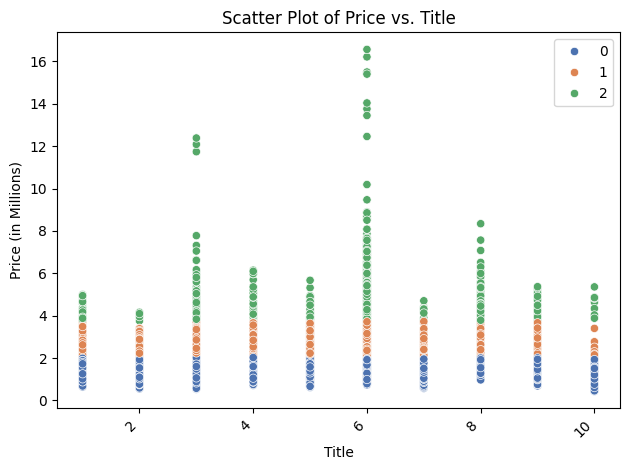

In [ ]:
# Create an OrdinalEncoder to convert 'title' to numerical representation
encoder = OrdinalEncoder(cols=['title'])

# Fit and transform the encoder on your DataFrame
Trainp_encoded = encoder.fit_transform(Trainp.copy())  # Create a copy to avoid modifying the original DataFrame

# Create the scatter plot using the encoded 'title' column
sns.scatterplot(
    x='title',
    y=Trainp_encoded['price'] / 1e6,  # Use the encoded DataFrame for price as well
    hue=labels,
    palette="deep",
    data=Trainp_encoded
)
plt.xlabel("Title")
plt.ylabel("Price (in Millions)")  # Make the y-axis label more informative
plt.title("Scatter Plot of Price vs. Title")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[4.16093168e+03, 2.76312484e-02, 2.08490329e-02, 2.29841748e-02,
        2.21049987e-02, 2.76312484e-02, 3.11479528e-02, 2.81336348e-02,
        2.31097714e-02, 1.58502889e-01, 1.55739764e-02, 8.16377795e-03,
        2.80080382e-02, 1.19316755e-02, 2.56217031e-02, 3.30319015e-02,
        3.10223562e-02, 2.11002261e-02, 1.99698568e-02, 2.57472997e-02,
        1.35644310e-02, 2.48681236e-02, 3.15247425e-02, 2.82592313e-02,
        2.96407938e-02, 1.84626978e-02, 2.73800553e-02, 2.68776689e-02,
        2.76312484e-02, 2.72544587e-02, 2.22305953e-02, 3.35342879e-02,
        3.07711630e-02, 3.11479528e-02, 2.81336348e-02, 1.20572720e-02,
        4.39588043e-03, 1.06380306e-01, 1.33885958e-01, 2.42401407e-01,
        8.16377795e-02, 9.93468978e-02, 2.16026124e-02, 1.16302437e-01,
        4.92338608e-02, 9.52022105e-02, 5.40065310e-02, 3.16051243e+00,
        2.58892238e+00, 2.97839739e+00, 1.45346358e+06],
       [5.86080431e+03, 2.21684805e-02, 3.08343410e-02, 2.76098347e-02,
       

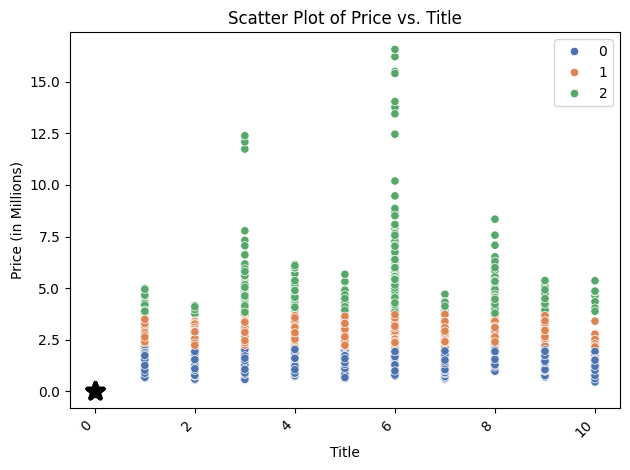

In [ ]:
sns.scatterplot(
    x='title',
    y=Trainp_encoded['price'] / 1e6,  # Use the encoded DataFrame for price as well
    hue=labels,
    palette="deep",
    data=Trainp_encoded
)
plt.scatter(centroids[:, 0] / 1e6, centroids[:, 1] / 1e6, marker='*', s=150, linewidths=3, color='black')
plt.xlabel("Title")
plt.ylabel("Price (in Millions)")  # Make the y-axis label more informative
plt.title("Scatter Plot of Price vs. Title")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
inertia = model.named_steps['kmeans'].inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 3754808509162062.0


In [ ]:
# 1. Create a LabelEncoder object
label_encoder = LabelEncoder()

# 2. Fit the encoder to the 'title' column and transform it
Trainp['title_encoded'] = label_encoder.fit_transform(Trainp['title'])

# 3. Now use the 'title_encoded' column (which contains numerical values)
#    instead of 'title' in your silhouette_score calculation:
ss = silhouette_score(Trainp[['title_encoded', 'price']], labels)  # Assuming 'price' is your other relevant column
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.5853412017185707


In [ ]:
n_clusters = range(2, 13)
inertias = []
silhouette_scores = []

for k in n_clusters:
    model = make_pipeline(
        OneHotEncoder(use_cat_names=True),
        SimpleImputer(),
        KMeans(n_clusters=k, random_state=42)
    )
    model.fit(Trainp)
    labels = model.predict(Trainp)

    # Transform Trainp using the fitted pipeline for silhouette_score calculation
    Trainp_transformed = model[:-1].transform(Trainp)  # Exclude KMeans step

    inertias.append(model.named_steps['kmeans'].inertia_)
    silhouette_scores.append(silhouette_score(Trainp_transformed, labels))
    print(f"Inertia ({k} clusters):", model.named_steps['kmeans'].inertia_)
    print(f"Silhouette Score ({k} clusters):", silhouette_score(Trainp_transformed, labels))

Inertia (2 clusters): 6807665050019436.0
Silhouette Score (2 clusters): 0.6252963019063017
Inertia (3 clusters): 3754808509262910.0
Silhouette Score (3 clusters): 0.585244337397344
Inertia (4 clusters): 2550602537694409.0
Silhouette Score (4 clusters): 0.5630709235505661
Inertia (5 clusters): 1820840169911875.0
Silhouette Score (5 clusters): 0.5496083652618233
Inertia (6 clusters): 1198413466396781.8
Silhouette Score (6 clusters): 0.5419407852917372
Inertia (7 clusters): 868691890466626.0
Silhouette Score (7 clusters): 0.5348919979165031
Inertia (8 clusters): 652706870080918.4
Silhouette Score (8 clusters): 0.5294648296655338
Inertia (9 clusters): 522278573659854.7
Silhouette Score (9 clusters): 0.528763461149631
Inertia (10 clusters): 434911457870517.2
Silhouette Score (10 clusters): 0.5276472628393187
Inertia (11 clusters): 354880750341422.5
Silhouette Score (11 clusters): 0.5290211426059523
Inertia (12 clusters): 299398414535126.2
Silhouette Score (12 clusters): 0.5237970182534429


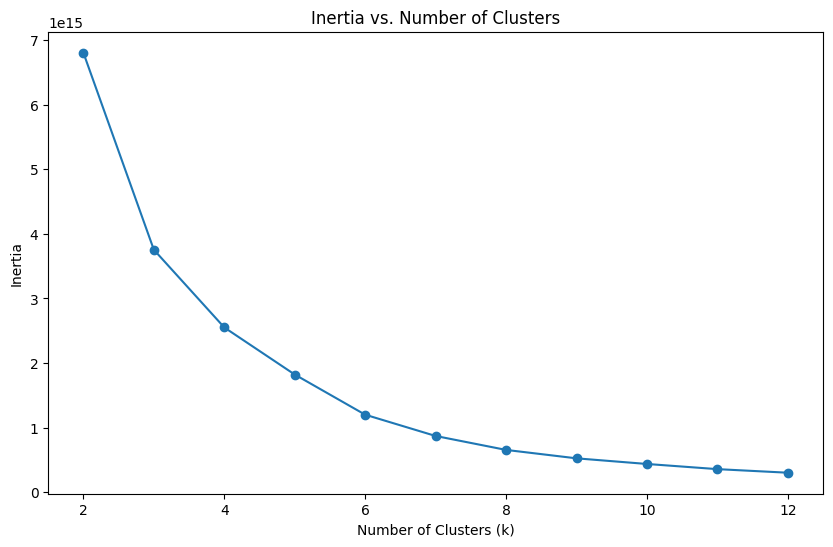

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters');

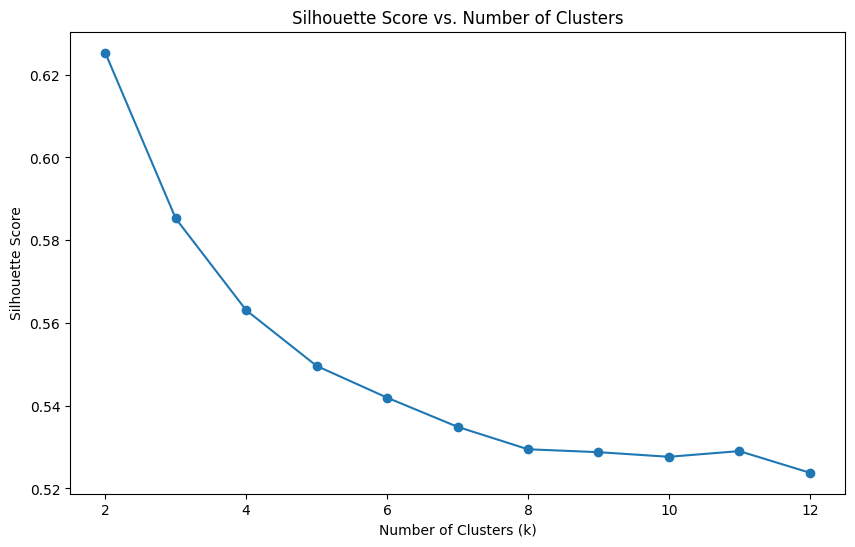

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters');

In [ ]:
final_model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    KMeans(n_clusters=4, random_state=42)
)
final_model.fit(Trainp)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['loc', 'title'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [ ]:
labels = final_model.predict(Trainp)
labels[-10:]

array([1, 3, 3, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

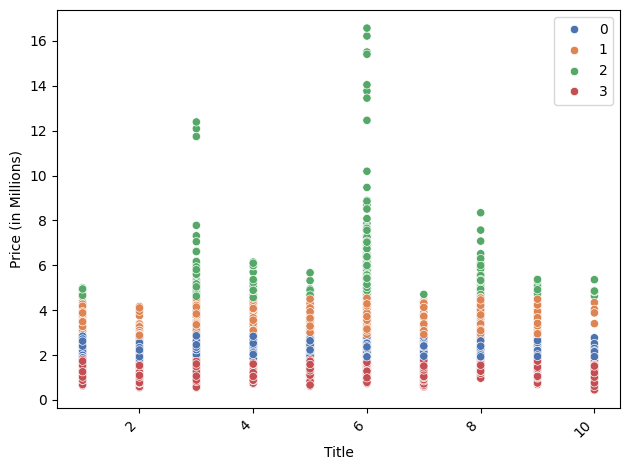

In [ ]:
sns.scatterplot(
    x='title',
    y=Trainp_encoded['price'] / 1e6,  # Use the encoded DataFrame for price as well
    hue=final_model.predict(Trainp),
    palette="deep",
    data=Trainp_encoded
)
plt.xlabel("Title")
plt.ylabel("Price (in Millions)")  # Make the y-axis label more informative
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Convert the predicted cluster labels to a column in the DataFrame
Trainp['cluster'] = final_model.predict(Trainp)

# Select only numeric columns before calculating the mean
numeric_features = Trainp.select_dtypes(include=['number'])

# Group by the 'cluster' column and calculate the mean of numeric features
xgb = numeric_features.groupby('cluster').mean()

xgb.head()

,ID,bedroom,bathroom,parking_space,price,title_encoded
cluster,,,,,,
0,5583.097356,5.172476,3.360577,3.317708,2.273681e+06,4.830329
1,6006.551607,6.011198,3.604187,3.390944,3.468598e+06,5.249757
2,5135.135903,5.987830,3.375254,3.261663,5.643227e+06,5.028398
3,3921.669091,2.885002,2.474694,2.930661,1.342875e+06,4.138678


In [ ]:
final_model.named_steps['kmeans'].cluster_centers_

array([[ 5.57981210e+03,  2.56410256e-02,  2.70432692e-02,
         2.62419872e-02,  2.90464744e-02,  2.06330128e-02,
         1.96314103e-02,  2.48397436e-02,  2.62419872e-02,
         1.48437500e-01,  3.36538462e-02,  2.80448718e-02,
         1.90304487e-02,  2.80448718e-02,  2.30368590e-02,
         1.84294872e-02,  2.24358974e-02,  2.70432692e-02,
         2.52403846e-02,  2.60416667e-02,  2.86458333e-02,
         2.88461538e-02,  2.02323718e-02,  2.66426282e-02,
         2.18349359e-02,  3.26522436e-02,  2.26362179e-02,
         2.34375000e-02,  2.20352564e-02,  2.36378205e-02,
         2.78445513e-02,  2.08333333e-02,  1.74278846e-02,
         2.02323718e-02,  2.22355769e-02,  2.90464744e-02,
         1.30208333e-02,  9.75560897e-02,  7.63221154e-02,
         2.20152244e-01,  1.21594551e-01,  9.91586538e-02,
         5.84935897e-02,  8.93429487e-02,  1.18990385e-01,
         1.10777244e-01,  7.61217949e-03,  5.16987179e+00,
         3.36157853e+00,  3.31750801e+00,  2.27282963e+0

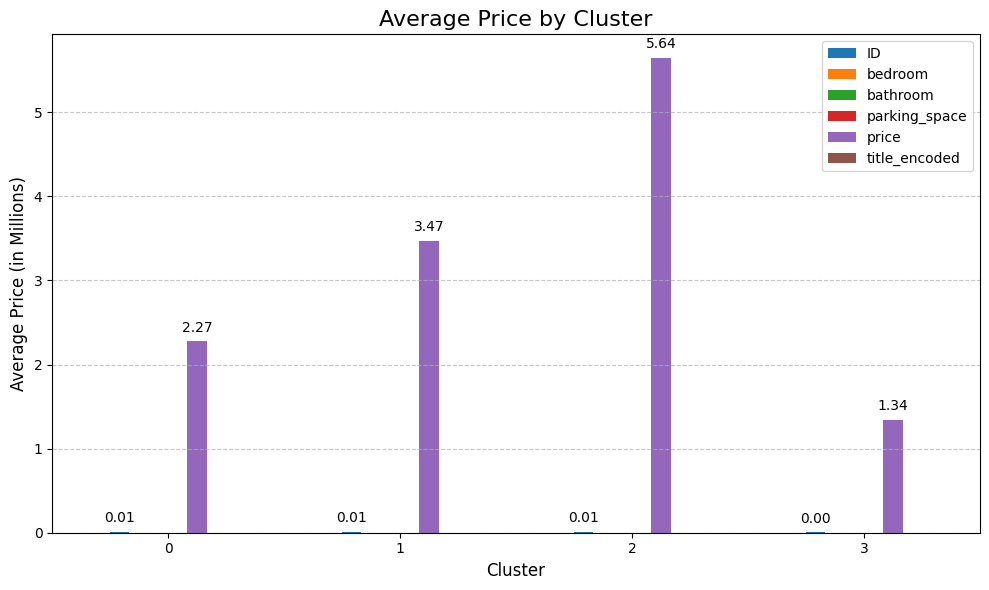

In [ ]:
# Create the bar plot
ax = (xgb / 1e6).plot(kind="bar", figsize=(10, 6))  # Adjust figsize for better visualization

# Customize the plot
plt.title("Average Price by Cluster", fontsize=16)  # Increase title font size
plt.xlabel("Cluster", fontsize=12)  # Increase x-axis label font size
plt.ylabel("Average Price (in Millions)", fontsize=12)  # Clarify y-axis units
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

# ... (previous code) ...

# Add value labels to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0.001:  # Set a threshold for displaying values (e.g., 0.001)
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


In [ ]:
# Calculate variance for only numeric features
numeric_features = Trainp.select_dtypes(include=['number'])
variance = numeric_features.var().sort_values(ascending=False)

print(variance)

price            1.173012e+12
ID               1.457978e+07
title_encoded    7.358325e+00
bedroom          5.204098e+00
bathroom         3.755124e+00
parking_space    2.230440e+00
cluster          1.875946e+00
dtype: float64


In [ ]:
top_seven_features = variance.head(7)
top_seven_features

,0
price,1.173012e+12
ID,1.457978e+07
title_encoded,7.358325e+00
bedroom,5.204098e+00
bathroom,3.755124e+00
parking_space,2.230440e+00
cluster,1.875946e+00


In [ ]:
fig = px.bar(
    x=top_seven_features,
    y=top_seven_features.index,
    labels={"x": "Feature", "y": "Variance"},
    title="Top 7 Features by Variance"
)
fig.show()

In [ ]:
fig = px.box(Trainp, x="loc", y="price", title="Price Distribution by Location")
fig.show()

In [ ]:
Trainp["price"].var()

1173011739352.5774

In [ ]:
trimmed_variance = trimmed_var(Trainp["price"])
print("Trimmed Variance:", trimmed_variance)

Trimmed Variance: 359681721722.34216


In [ ]:
# Calculate variance for only numeric features
numeric_features = Trainp.select_dtypes(include=['number'])
trim_var = numeric_features.apply(trimmed_var, limits=(0.1, 0.1)).sort_values()

print(trim_var)

parking_space    1.210542e+00
cluster          1.779036e+00
bathroom         2.287097e+00
bedroom          2.742877e+00
title_encoded    4.234125e+00
ID               9.163605e+06
price            3.596817e+11
dtype: float64


In [ ]:
top_seven_features.index.to_list()

['price',
 'ID',
 'title_encoded',
 'bedroom',
 'bathroom',
 'parking_space',
 'cluster']

In [ ]:
high_var_cols = top_seven_features.index.to_list()
high_var_cols

['price',
 'ID',
 'title_encoded',
 'bedroom',
 'bathroom',
 'parking_space',
 'cluster']

In [ ]:
X = Trainp[high_var_cols]
print("X shape:", X.shape)
X.head()

X shape: (14000, 7)


,price,ID,title_encoded,bedroom,bathroom,parking_space,cluster
0,1149999.565,3583,7,2.0,2.0,1.0,3
1,1672416.689,2748,0,4.0,2.0,4.0,3
2,3364799.814,9261,4,7.0,5.0,3.0,1
3,2410306.756,2224,3,5.0,2.0,4.0,0
4,2600700.898,10300,8,4.0,5.0,6.0,0


In [ ]:
X.mean()

,0
price,2.138082e+06
ID,4.862700e+03
title_encoded,4.579643e+00
bedroom,4.268571e+00
bathroom,2.988000e+00
parking_space,3.147857e+00
cluster,1.601643e+00


In [ ]:
X_summary = X.agg(["mean", "median", "std", "min", "max"]).astype(int)
X_summary

,price,ID,title_encoded,bedroom,bathroom,parking_space,cluster
mean,2138081,4862,4,4,2,3,1
median,1895223,3527,4,4,2,3,1
std,1083056,3818,2,2,1,1,1
min,431967,0,0,1,1,1,0
max,16568486,12999,9,9,7,6,3


In [ ]:
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)
X_scaled.head()

,price,ID,title_encoded,bedroom,bathroom,parking_space,cluster
0,-0.912341,-0.335157,0.892289,-0.994478,-0.509871,-1.438221,1.020995
1,-0.429970,-0.553846,-1.688331,-0.117734,-0.509871,0.570601,1.020995
2,1.132685,1.151927,-0.213691,1.197382,1.038320,-0.099006,-0.439283
3,0.251358,-0.691083,-0.582351,0.320638,-0.509871,0.570601,-1.169422
4,0.427157,1.424043,1.260949,-0.117734,1.038320,1.909816,-1.169422


In [ ]:
X_scaled_summary = X_scaled.agg(["mean", "std"]).astype(int)
X_scaled_summary

,price,ID,title_encoded,bedroom,bathroom,parking_space,cluster
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1


In [ ]:
n_clusters = range(2, 13)
inertias = []
silhouette_scores = []

for k in n_clusters:
    model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=k, random_state=42)
    )
    model.fit(X)
    labels = model.predict(X)
    # The following lines were incorrectly indented, causing the error.
    # They should be aligned with the 'model.fit(X)' line.
    inertias.append(model.named_steps['kmeans'].inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

    print(f"Inertia ({k} clusters):", model.named_steps['kmeans'].inertia_)
    print(f"Silhouette Score ({k} clusters):", silhouette_score(X, labels))

Inertia (2 clusters): 72433.55047405254
Silhouette Score (2 clusters): 0.479139792437861
Inertia (3 clusters): 66226.72164155587
Silhouette Score (3 clusters): 0.08823729963038666
Inertia (4 clusters): 58722.72240852398
Silhouette Score (4 clusters): -0.029591418528795026
Inertia (5 clusters): 54595.27212698132
Silhouette Score (5 clusters): -0.06192894341692462
Inertia (6 clusters): 50507.646143322505
Silhouette Score (6 clusters): -0.011920164553732878
Inertia (7 clusters): 46677.65394370611
Silhouette Score (7 clusters): -0.03480808696582949
Inertia (8 clusters): 45111.528395185676
Silhouette Score (8 clusters): -0.050284317859416186
Inertia (9 clusters): 42483.10106398912
Silhouette Score (9 clusters): -0.05783720916437067
Inertia (10 clusters): 41106.87300676458
Silhouette Score (10 clusters): -0.06664068346314503
Inertia (11 clusters): 39332.228069404926
Silhouette Score (11 clusters): -0.08942439190592374
Inertia (12 clusters): 37944.71873771235
Silhouette Score (12 clusters): -

In [ ]:
fig = px.line(
    x=n_clusters,
    y=inertias,
    labels={"x": "Number of Clusters (k)", "y": "Inertia"},
    title="Inertia vs. Number of Clusters"
)
fig.show()

In [ ]:
fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    labels={"x": "Number of Clusters (k)", "y": "Silhouette Score"},
    title="Silhouette Score vs. Number of Clusters"
)
fig.show()

In [ ]:
final_model1 = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4, random_state=42)
)
final_model1.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [ ]:
labels = final_model1.predict(X)
labels[:5]

array([0, 0, 3, 1, 3], dtype=int32)

In [ ]:
xgb = X.groupby(labels).mean()
xgb

,price,ID,title_encoded,bedroom,bathroom,parking_space,cluster
0,1.313524e+06,2038.872674,4.157512,2.936450,1.702678,2.646618,3.000000
1,2.660552e+06,3140.719374,5.108022,4.405734,2.203591,2.821025,0.309875
2,1.429441e+06,8022.368620,4.102552,2.728261,4.143195,3.549622,2.919187
3,2.965012e+06,7770.011429,4.839255,6.418882,4.460621,3.765714,0.486460


In [ ]:
# Assuming xgb is a Pandas DataFrame
fig = px.bar(
    xgb,
    barmode='group',
    labels={"x": "Cluster", "y": "Average Price"},
    title="Average Price by Cluster"
)
fig.show()



In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
X_pca_scaled = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
print("X_pca_scaled shape:", X_pca_scaled.shape)
X_pca_scaled.head()

X_pca_scaled shape: (14000, 2)


,PC1,PC2
0,-9.880828e+05,-697.623368
1,-4.656662e+05,-1840.377825
2,1.226720e+06,3675.642174
3,2.722234e+05,-2799.067033
4,4.626223e+05,5164.771129


In [ ]:
labels

array([0, 0, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
# Ensure you're using 'px' from plotly.express
fig = px.scatter(
    x=X_pca_scaled["PC1"],  # Access PC1 column directly
    y=X_pca_scaled["PC2"],  # Access PC2 column directly
    color=labels.astype(str),  # Convert labels to string for color
    title="PCA Scatter Plot"
)
fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2"
)
fig.show()

**Application Layout**

In [ ]:
from dash import Dash, Input, Output, dcc, html  # Import Dash
# Instantiate a JupyterDash application and assign it to the variable name app
app = Dash(__name__)

In [ ]:
 app.layout = html.Div(
    [
        # Application title
        html.H1("Survey of House price"),
        # Bar chart element
        html.H2("High Variance Features"),
        # Bar chart graph
        dcc.Graph(id="bar-chart"),
        dcc.RadioItems(
            options=[
                {"label": "trimmed", "value": True},
                {"label": "not trimmed", "value": False}
            ],
            value=True,
            id="trim-button"
        ),
        html.H2("K-means Clustering"),
        html.H3("Number of Clusters (k)"),
        dcc.Slider(min=2, max=12, step=1, value=2, id="k-slider"),
        html.Div(id="metrics"),
        # PCA scatter plot
        dcc.Graph(id="pca-scatter")
    ]
)

In [ ]:
def get_high_var_features(trimmed=True, return_feat_names=True):

    """Returns the five highest-variance features of ``df``.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    return_feat_names : bool, default=False
        If ``True``, returns feature names as a ``list``. If ``False``
        returns ``Series``, where index is feature names and values are
        variances.
    """
    # calculate variance
    if trimmed:
        top_five_features= (
            numeric_features.apply(trimmed_var, limits=(0.1, 0.1)).sort_values().tail()
        )
    else:
        top_five_features = numeric_features.var().sort_values.tail()
    # Extract names
    if return_feat_names:
        top_five_features = top_five_features.index.tolist()

    return  top_five_features

In [ ]:
get_high_var_features()

['bathroom', 'bedroom', 'title_encoded', 'ID', 'price']

In [ ]:
@app.callback(
    Output("bar-chart", "figure"), Input("trim-button", "value"))

def serve_bar_chart(trimmed=True):

    """Returns a horizontal bar chart of five highest-variance features.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.
    """
    # Get features
    top_five_features = get_high_var_features(trimmed=trimmed, return_feat_names=False)

    # Build bar chart
    fig = px.bar(x=top_five_features, y=top_five_features.index, orientation="h")
    fig.update_layout(xaxis_title="Variance", yaxis_title="Features")

    return fig

In [ ]:
serve_bar_chart(trimmed=True)

In [ ]:
def get_model_metrics(trimmed=True, k=2, return_metrics=False):

    """Build ``KMeans`` model based on five highest-variance features in ``df``.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.

    return_metrics : bool, default=False
        If ``False`` returns ``KMeans`` model. If ``True`` returns ``dict``
        with inertia and silhouette score.

    """
    # Get high var features
    features = get_high_var_features(trimmed=trimmed, return_feat_names=True)
    # Create feature matrix
    X = Trainp[features]
    # Build model
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state=42))
    model.fit(X)
    if return_metrics:
        # calculate inertia
        i = model.named_steps["kmeans"].inertia_
        # calculate silhouette score
        ss = silhouette_score(X, model.named_steps["kmeans"].labels_)
        # put results into dictionary
        metrics = {
            "inertia": round(i),
            "silhouette": round(ss, 3)
        }
        # return dictionary to user
        return metrics

    return model

In [ ]:
get_model_metrics(trimmed=True, k=20, return_metrics=False)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=20, random_state=42))])

In [ ]:
@app.callback(
    Output("metrics", "children"),
    Input("trim-button", "value"),
    Input("k-slider", "value")

)


def serve_metrics(trimmed=True, k=2):

    """Returns list of ``H3`` elements containing inertia and silhouette score
    for ``KMeans`` model.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.
    """
    # Get metrics
    metrics = get_model_metrics(trimmed=trimmed, k=k, return_metrics=True)

    # Add metrics to HTML elements
    text = [
        html.H3(f"Inertia: {metrics['inertia']}"),
        html.H3(f"Silhouette Score: {metrics['silhouette']}")
    ]

    return text

In [ ]:
serve_metrics()

[H3('Inertia: 52060'), H3('Silhouette Score: 0.295')]

In [ ]:
def get_pca_labels(trimmed=True, k=2):

    """
    ``KMeans`` labels.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.
    """
    # Create feature matrix
    features = get_high_var_features(trimmed=trimmed, return_feat_names=True)
    X = Trainp[features]

    # Build transformer
    transformer = PCA(n_components=2, random_state=42)

    # Transform data
    X_t = transformer.fit_transform(X)
    X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])

    # Add labels
    model = get_model_metrics(trimmed=trimmed, k=k, return_metrics=False)
    X_pca["labels"] = model.named_steps["kmeans"].labels_.astype(str)
    X_pca.sort_values("labels", inplace=True)

    return X_pca

In [ ]:
get_pca_labels().tail()

,PC1,PC2,labels
6575,1.286415e+05,7130.518941,1
6572,6.767525e+05,5597.626837,1
6570,-1.527543e+04,6573.299170,1
6567,2.199955e+06,-269.689311,1
13999,7.204373e+05,3499.892998,1


In [ ]:
@app.callback(
    Output("pca-scatter", "figure"),
    Input("trim-button", "value"),
    Input("k-slider", "value")
)
def serve_scatter_plot(trimmed=True, k=2):

    """Build 2D scatter plot of ``df`` with ``KMeans`` labels.

    Parameters
    ----------
    trimmed : bool, default=True
        If ``True``, calculates trimmed variance, removing bottom and top 10%
        of observations.

    k : int, default=2
        Number of clusters.
    """
    fig = px.scatter(
        data_frame=get_pca_labels(trimmed=trimmed, k=k),
        x="PC1",
        y="PC2",
        color="labels",
        title="PCA Representation of Cluster"
    )
    fig.update_layout(xaxis_title="PC1", yaxis_title="PC2")

    return fig

In [ ]:
serve_scatter_plot(trimmed=True, k=5)

In [ ]:
app.run_server(mode="inline", host = "localhost")

<IPython.core.display.Javascript object>